# Project 30: Sentiment of Technical Debt Dataset

In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [10,5]

C:\Users\mirok\AppData\Local\Temp\ipykernel_20084\352070470.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


*1. We want to comprehend each categories in terms of wording they do contain. For this purpose, group
comments pertaining to the same category in the same document, perform appropriate filtering and
lemmatization, then plot WordCloud representation of the associated file. Draw a histogram of the
twenty frequent words in each category.*

In [2]:
# Read data and create lists of comments for each class
df = pd.read_csv("technical_debt_dataset/technical_debt_dataset.csv")

defect_list = df[df["classification"]=="DEFECT"]["commenttext"].values.tolist()
design_list = df[df["classification"]=="DESIGN"]["commenttext"].values.tolist()
test_list = df[df["classification"]=="TEST"]["commenttext"].values.tolist()
documentation_list = df[df["classification"]=="DOCUMENTATION"]["commenttext"].values.tolist()
implementation_list = df[df["classification"]=="IMPLEMENTATION"]["commenttext"].values.tolist()
technical_dept_list = defect_list + design_list + test_list + documentation_list + implementation_list
other_list = df[df["classification"]=="WITHOUT_CLASSIFICATION"]["commenttext"].values.tolist()
all_list = technical_dept_list + other_list

# Preprocessing

# Remove comment tags
for list in [defect_list, design_list, test_list, documentation_list, implementation_list, other_list]:
    for i in range(len(list)):
        list[i] = " ".join(list[i].replace("//", "").replace("/*", "").replace("*/", "").replace("*", "").strip().split())

# print("Defects: ", defect_list[:5])
# print("Design: ", design_list[:5])
# print("Test: ", test_list[:5])
# print("Documentation: ", documentation_list[:5])
# print("Implementation: ", implementation_list[:5])
# print("Other: ", other_list[:5])

In [11]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation

#nltk.download('stopwords')

# Stoplist

filtered_tokens = ["``", "''"]

for char in punctuation:
    filtered_tokens.append(char)

stopwords = stopwords.words('english')

stoplist = filtered_tokens + stopwords

# Category lists
defect_words = []
design_words = []
test_words = []
documentation_words =  []
implementation_words =  []
other_words =  []

# Tokenise, filter and lemmatise words

def comment_to_words(list, category_words):
    for comment in list:
        words = nltk.word_tokenize(comment)
        for word in words:
            if word not in stoplist:
                word = WordNetLemmatizer().lemmatize(word).lower()
                category_words.append(word)

comment_to_words(defect_list, defect_words)
comment_to_words(design_list, design_words)
comment_to_words(test_list, test_words)
comment_to_words(documentation_list, documentation_words)
comment_to_words(implementation_list, implementation_words)
comment_to_words(other_list, other_words)

technical_dept_words = defect_words + design_words + test_words + documentation_words + implementation_words

# print("Defect words: " + str(defect_words))
# print("Design words: " + str(design_words))
# print("Test words: " + str(test_words))
# print("Documentation words: " + str(documentation_words))
# print("Implementation words: " + str(implementation_words))
# print("Technical debt words: " + str(technical_dept_words))
# print("Other words: " + str(other_words))

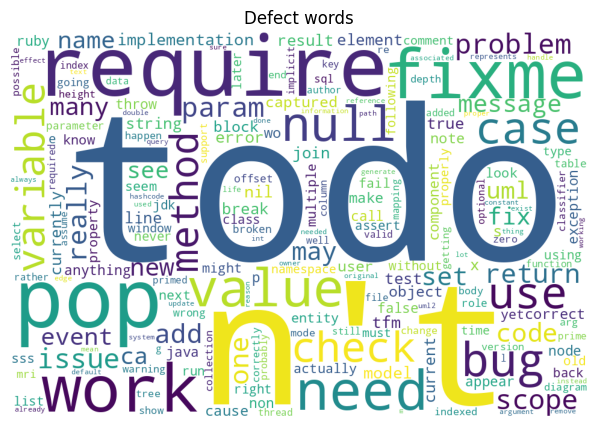

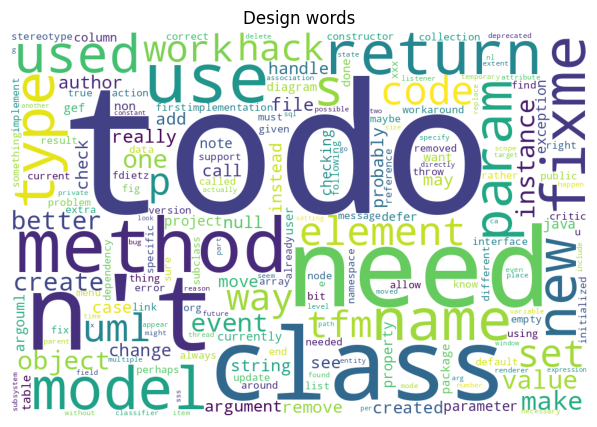

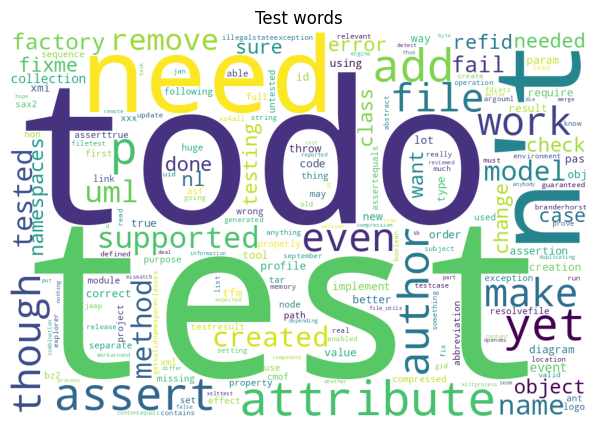

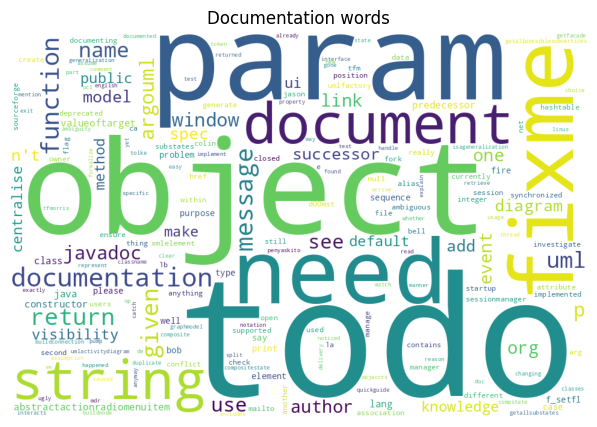

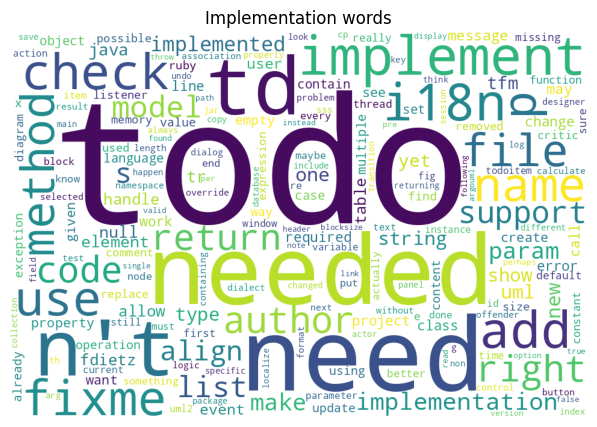

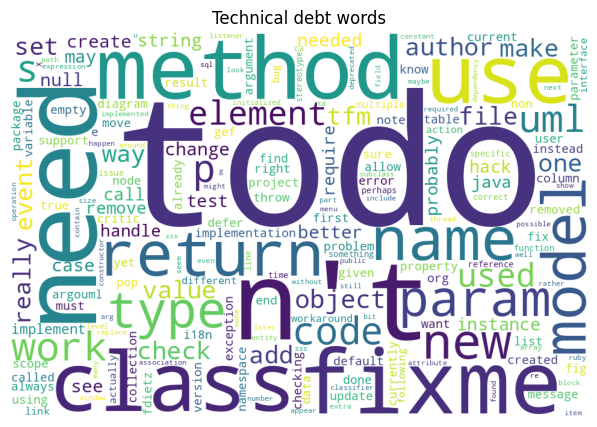

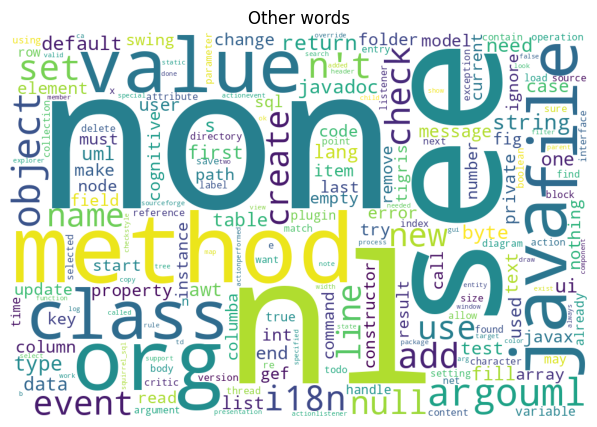

In [12]:
from wordcloud import WordCloud

def wordcloud(title, words):
    wordcloud = WordCloud(width=960, height=640, background_color="white",collocations=False, relative_scaling=0.5).generate(words)
    plt.title(title)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

wordcloud("Defect words", " ".join(defect_words))
wordcloud("Design words", " ".join(design_words))
wordcloud("Test words", " ".join(test_words))
wordcloud("Documentation words", " ".join(documentation_words))
wordcloud("Implementation words", " ".join(implementation_words))
wordcloud("Technical debt words", " ".join(technical_dept_words))
wordcloud("Other words", " ".join(other_words))

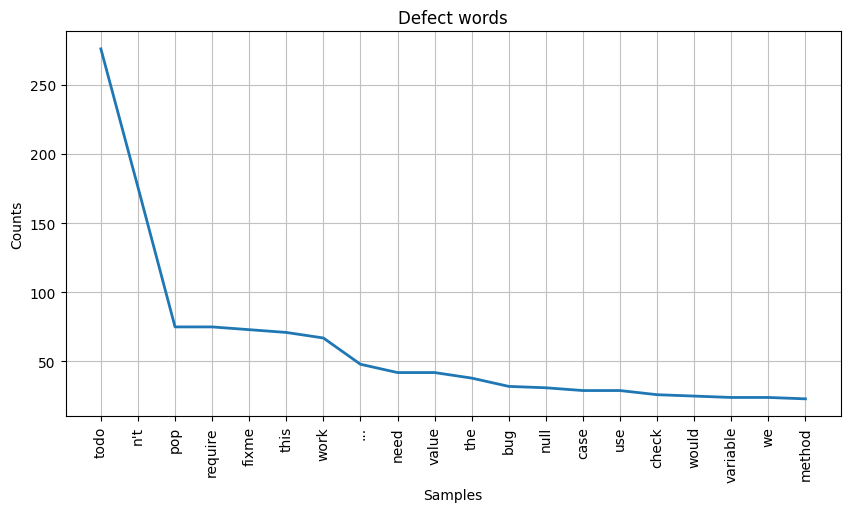

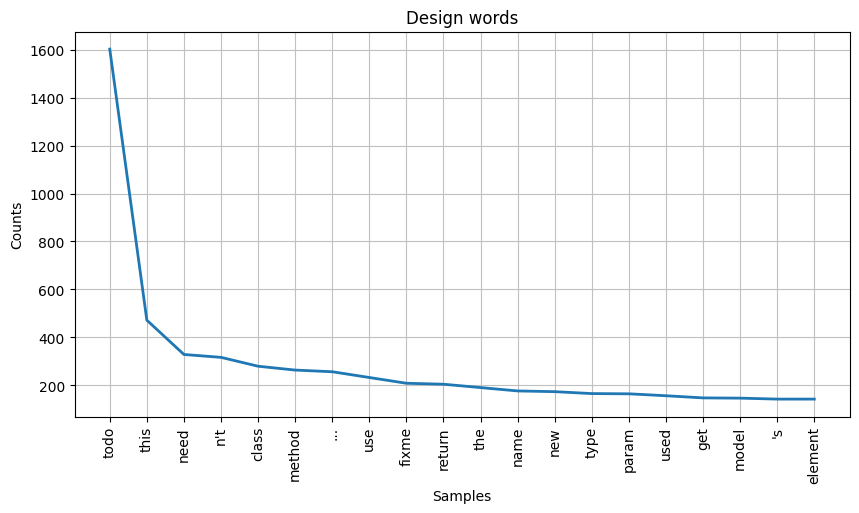

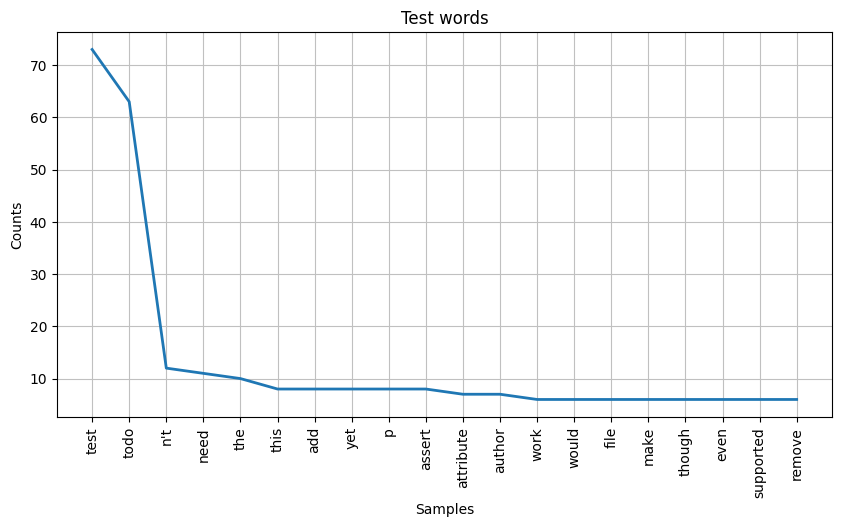

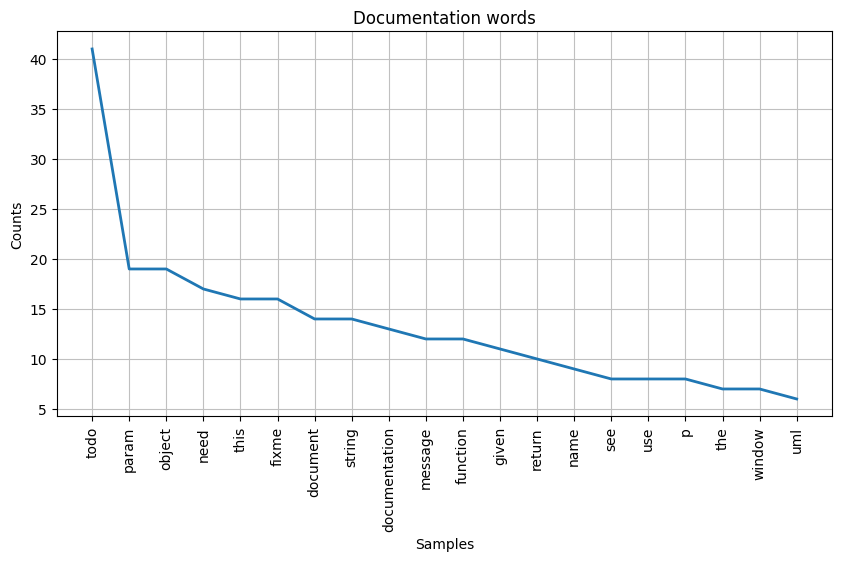

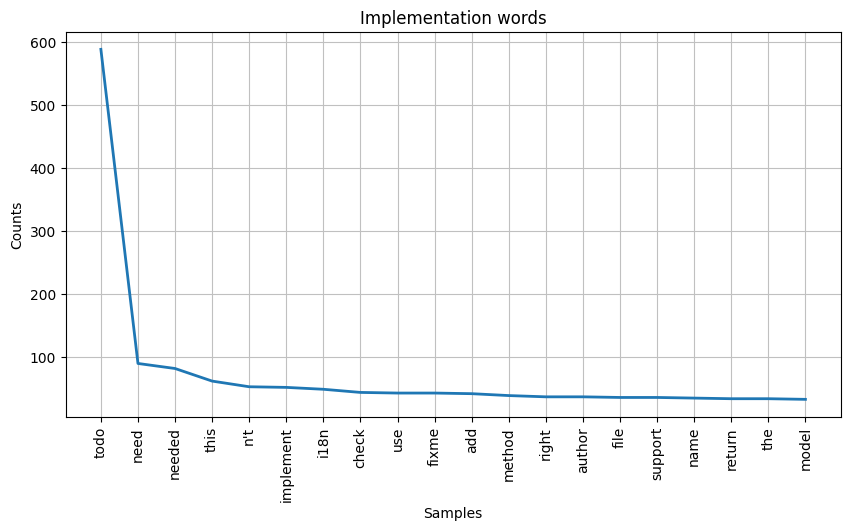

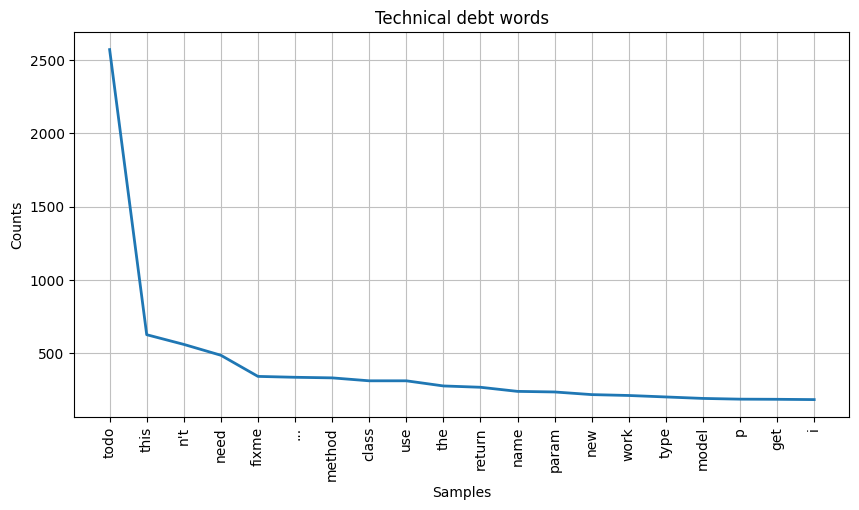

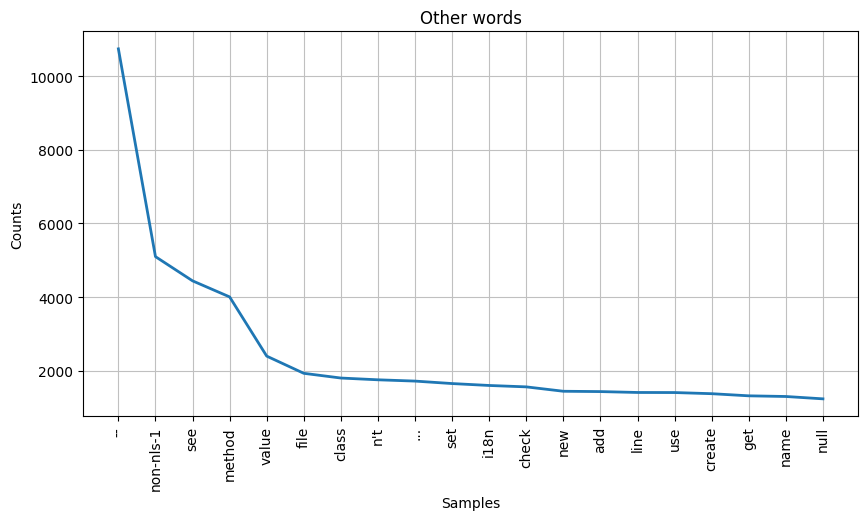

In [13]:
from nltk.probability import FreqDist

# Frequency distributions
plt.figure()
defect_fd = FreqDist(defect_words)
defect_fd.plot(20, title="Defect words", show=False)
plt.figure()
design_fd = FreqDist(design_words)
design_fd.plot(20, title="Design words", show=False)
plt.figure()
test_fd = FreqDist(test_words)
test_fd.plot(20, title="Test words", show=False)
plt.figure()
documentation_fd = FreqDist(documentation_words)
documentation_fd.plot(20, title="Documentation words", show=False)
plt.figure()
implementation_fd = FreqDist(implementation_words)
implementation_fd.plot(20, title="Implementation words", show=False)
plt.figure()
technical_dept_fd = FreqDist(technical_dept_words)
technical_dept_fd.plot(20, title="Technical debt words", show=False)
plt.figure()
other_fd = FreqDist(other_words)
other_fd.plot(20, title="Other words", show=False)
plt.show()

*2. We want to find out if one can characterize each category in terms of unique words it contain. For this
purpose, after appropriate preprocessing and lemmatization, construct a vocabulary S of the common
words that appear in all categories, and vocabulary S1, S2, S3, S4, S5, S6 of wording that were uniquely
present in a given category not in any other categories. Discuss the cardinality of S, S1, S2, S3, S4, S5
and S6. Draw histogram showing the frequency of the unique wording in each category. Store S, S1, S2,
S3, S4, S5 and S6 in a separate database, say D1.*

Common words across all categories: 105 (0.011 %)
Unique defect words: 328 (0.058 %)
Unique design words: 1773 (0.054 %)
Unique test words: 58 (0.059 %)
Unique documentation words: 36 (0.044 %)
Unique implementation words: 331 (0.050 %)
Unique technical dept words: 2635 (0.056 %)
Unique other words: 21702 (0.079 %)


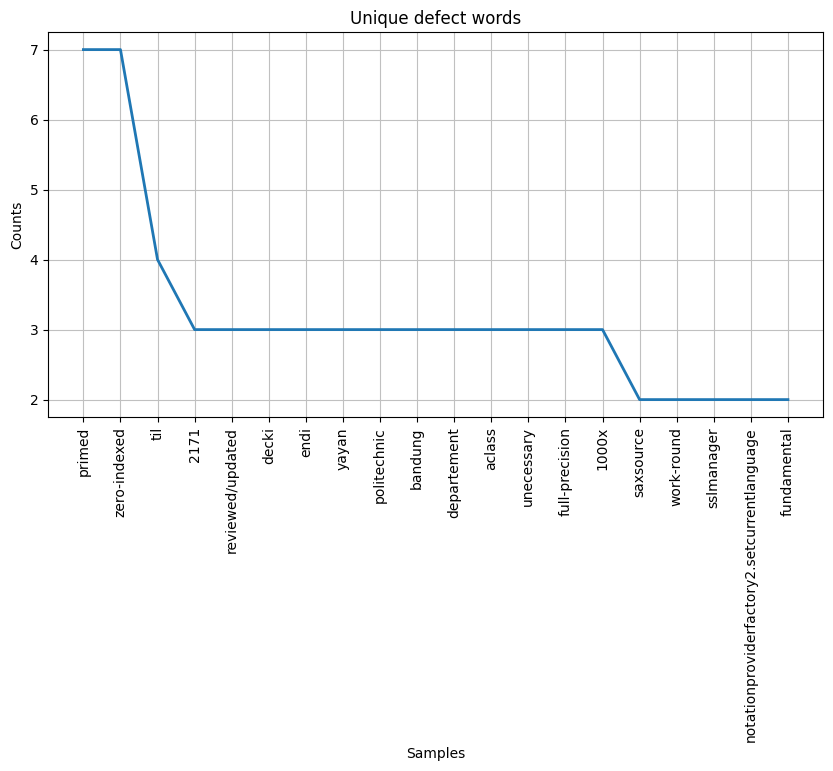

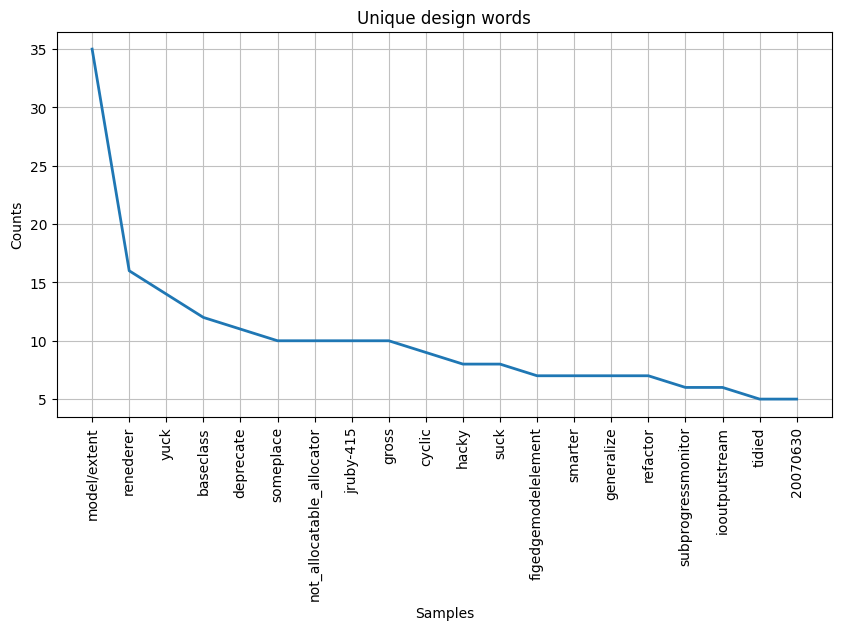

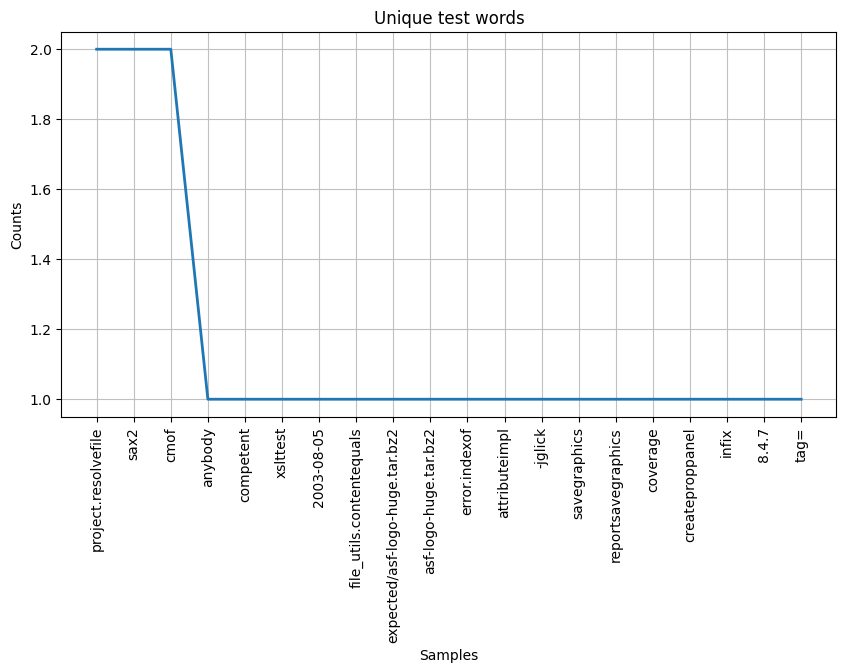

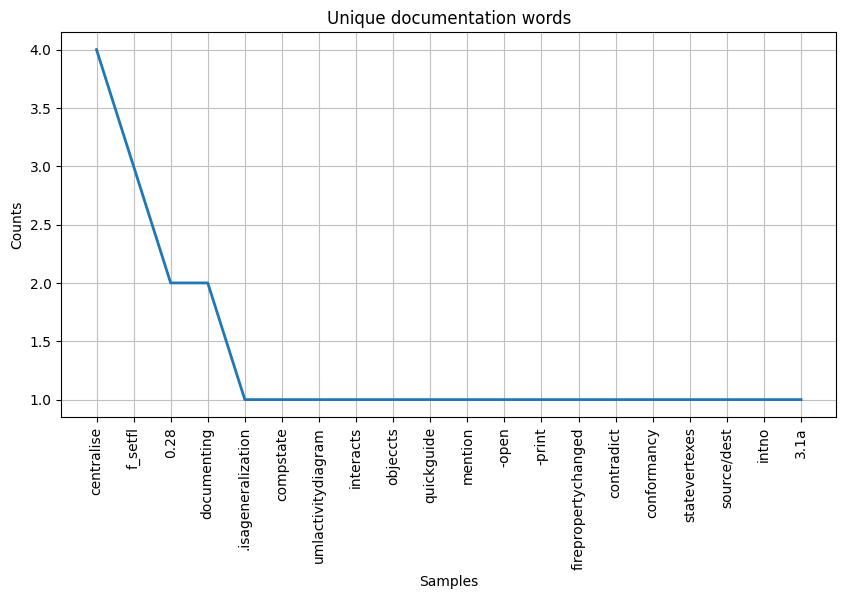

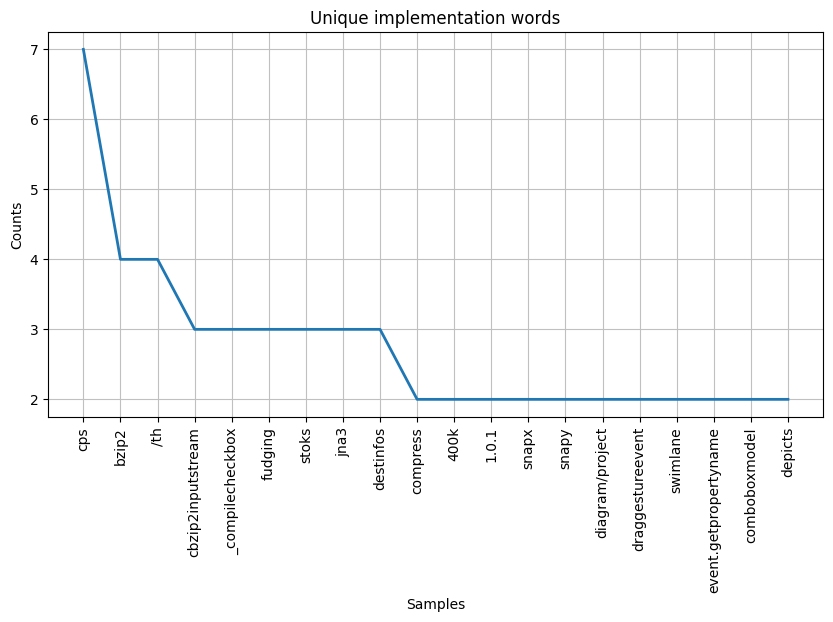

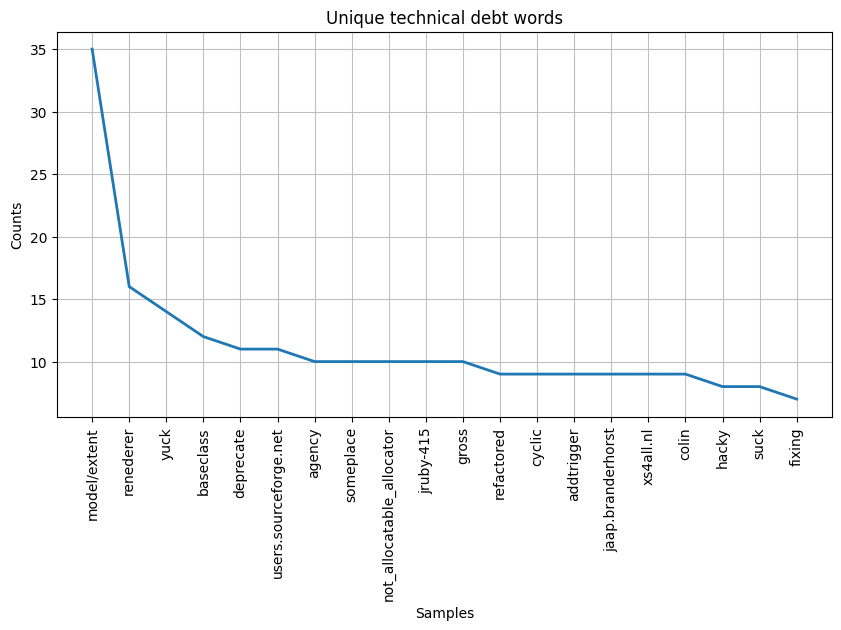

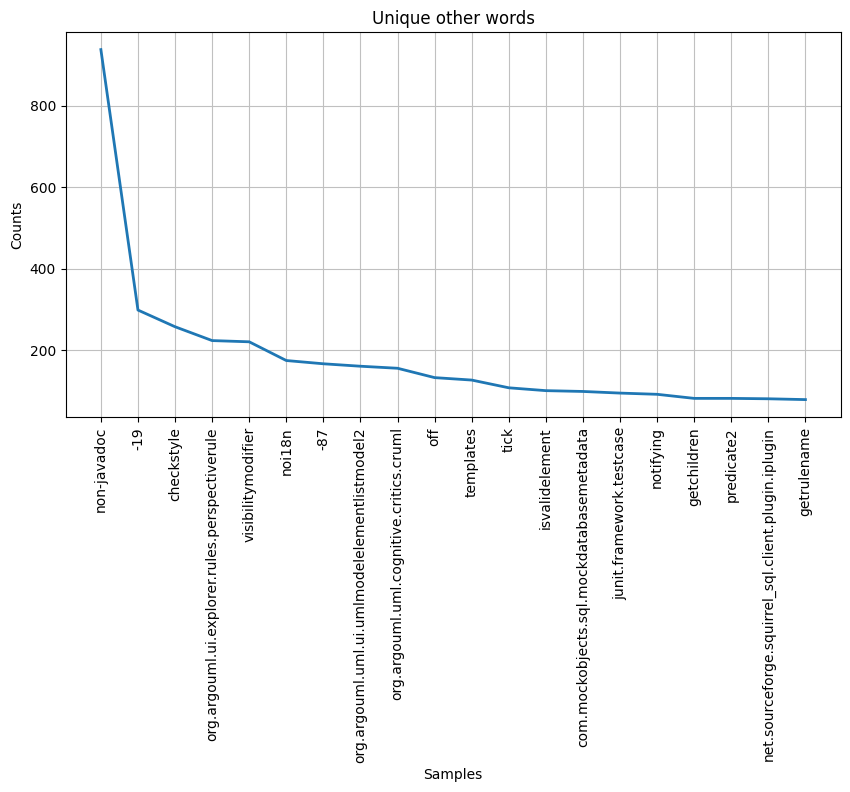

In [25]:
# Convert lists to sets to remove duplicate words
defect_words_set = set(defect_words)
design_words_set = set(design_words)
test_words_set = set(test_words)
documentation_words_set = set(documentation_words)
implementation_words_set = set(implementation_words)
technical_dept_words_set = set(technical_dept_words)
other_words_set = set(other_words)

# Find the words that are common to all categories
common_words = [word for word in defect_words_set if word in design_words_set and word in test_words_set and word in documentation_words_set and word in implementation_words_set and word in other_words_set]
print(f"Common words across all categories: {len(common_words)} ({len(common_words)/(len(defect_words_set) + len(design_words_set) + len(test_words_set) + len(documentation_words_set) + len(implementation_words_set)):.3f} %)")

# Find the words that are unique to each category
defect_words_unique = [word for word in defect_words_set if word not in design_words_set and word not in test_words_set and word not in documentation_words_set and word not in implementation_words_set and word not in other_words_set]
print(f"Unique defect words: {len(defect_words_unique)} ({len(defect_words_unique)/len(defect_words):.3f} %)")

design_words_unique = [word for word in design_words_set if word not in defect_words_set and word not in test_words_set and word not in documentation_words_set and word not in implementation_words_set and word not in other_words_set]
print(f"Unique design words: {len(design_words_unique)} ({len(design_words_unique)/len(design_words):.3f} %)")

test_words_unique = [word for word in test_words_set if word not in defect_words_set and word not in design_words_set and word not in documentation_words_set and word not in implementation_words_set and word not in other_words_set]
print(f"Unique test words: {len(test_words_unique)} ({len(test_words_unique)/len(test_words):.3f} %)")

documentation_words_unique = [word for word in documentation_words_set if word not in defect_words_set and word not in design_words_set and word not in test_words_set and word not in implementation_words_set and word not in other_words_set]
print(f"Unique documentation words: {len(documentation_words_unique)} ({len(documentation_words_unique)/len(documentation_words):.3f} %)")

implementation_words_unique = [word for word in implementation_words_set if word not in defect_words_set and word not in design_words_set and word not in test_words_set and word not in documentation_words_set and word not in other_words_set]
print(f"Unique implementation words: {len(implementation_words_unique)} ({len(implementation_words_unique)/len(implementation_words):.3f} %)")

technical_dept_words_unique = [word for word in technical_dept_words_set if word not in other_words_set]
print(f"Unique technical dept words: {len(technical_dept_words_unique)} ({len(technical_dept_words_unique)/len(technical_dept_words):.3f} %)")

other_words_unique = [word for word in other_words_set if word not in defect_words_set and word not in design_words_set and word not in test_words_set and word not in documentation_words_set and word not in implementation_words_set]
print(f"Unique other words: {len(other_words_unique)} ({len(other_words_unique)/len(other_words):.3f} %)")

# Frequency distributions of unique words
plt.figure()
defect_fd_unique = [pair for pair in defect_fd.items() if pair[0] in defect_words_unique]
defect_fd_unique = dict(defect_fd_unique)
defect_fd_unique = FreqDist(defect_fd_unique)
defect_fd_unique.plot(20, title="Unique defect words", show=False)
plt.figure()
design_fd_unique = [pair for pair in design_fd.items() if pair[0] in design_words_unique]
design_fd_unique = dict(design_fd_unique)
design_fd_unique = FreqDist(design_fd_unique)
design_fd_unique.plot(20, title="Unique design words", show=False)
plt.figure()
test_fd_unique = [pair for pair in test_fd.items() if pair[0] in test_words_unique]
test_fd_unique = dict(test_fd_unique)
test_fd_unique = FreqDist(test_fd_unique)
test_fd_unique.plot(20, title="Unique test words", show=False)
plt.figure()
documentation_fd_unique = [pair for pair in documentation_fd.items() if pair[0] in documentation_words_unique]
documentation_fd_unique = dict(documentation_fd_unique)
documentation_fd_unique = FreqDist(documentation_fd_unique)
documentation_fd_unique.plot(20, title="Unique documentation words", show=False)
plt.figure()
implementation_fd_unique = [pair for pair in implementation_fd.items() if pair[0] in implementation_words_unique]
implementation_fd_unique = dict(implementation_fd_unique)
implementation_fd_unique = FreqDist(implementation_fd_unique)
implementation_fd_unique.plot(20, title="Unique implementation words", show=False)
plt.figure()
technical_dept_fd_unique = [pair for pair in technical_dept_fd.items() if pair[0] in technical_dept_words_unique]
technical_dept_fd_unique = dict(technical_dept_fd_unique)
technical_dept_fd_unique = FreqDist(technical_dept_fd_unique)
technical_dept_fd_unique.plot(20, title="Unique technical debt words", show=False)
plt.figure()
other_fd_unique = [pair for pair in other_fd.items() if pair[0] in other_words_unique]
other_fd_unique = dict(other_fd_unique)
other_fd_unique = FreqDist(other_fd_unique)
other_fd_unique.plot(20, title="Unique other words", show=False)
plt.show()

*3. Use LDA with topics equal 6 and 20 words per topic. We would like to find out whether output of the
LDA matches the categorization provided by word frequency or unique wording. For this purpose, for
each topic, try to match the words of the topics to the twenty most frequent words and use a simple
string matching (i.e., Fuzzy-string matching) to report the percentage of string matching between two
sets. We shall proceed by elimination; namely, for each category characterized by its twenty most
frequent words, we compute the fuzzy-string matching with every topic and the assignment is made to
the topic that achieves the highest score. Discuss on the usefulness of this approach.*

In [29]:
# tän ajamisessa menee pari minuuttia

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Create a bag-of-words matrix as input to LDA and fit the model
vectorizer = CountVectorizer(stop_words='english', strip_accents="unicode")
X = vectorizer.fit_transform(all_list)
lda_6 = LatentDirichletAllocation(n_components=6, learning_method='batch', random_state=0)
# lda_2 = LatentDirichletAllocation(n_components=2, learning_method='batch', random_state=0)
X_topics_6 = lda_6.fit_transform(X)
# X_topics_2 = lda_2.fit_transform(X)

In [32]:
from fuzzywuzzy import fuzz

topic_1_words = []
topic_2_words = []
topic_3_words = []
topic_4_words = []
topic_5_words = []
topic_6_words = []

# Display the topics
print("""
Topics:
""")
n_top_words = 20
feature_names = np.array(vectorizer.get_feature_names_out())
for topic_idx, topic in enumerate(lda_6.components_):
      print("Topic %d:" % (topic_idx + 1), end=" ")
      if topic_idx == 0:
            topic_1_words.extend([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
            print(" ".join(feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]))
      elif topic_idx == 1:
            topic_2_words.extend([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
            print(" ".join(feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]))
      elif topic_idx == 2:
            topic_3_words.extend([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
            print(" ".join(feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]))
      elif topic_idx == 3:
            topic_4_words.extend([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
            print(" ".join(feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]))
      elif topic_idx == 4:
            topic_5_words.extend([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
            print(" ".join(feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]))
      elif topic_idx == 5:
            topic_6_words.extend([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
            print(" ".join(feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]))
    

# print(
# """
# ---------
# 2 topics:
# ---------
# """
# )
# n_top_words = 20
# feature_names = np.array(vectorizer.get_feature_names_out())
# for topic_idx, topic in enumerate(lda_2.components_):
#       print("Topic %d:" % (topic_idx + 1))
#       if topic_idx == 0:
#             print(" ".join(feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]))
#       elif topic_idx == 1:
#             print(" ".join(feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]))


defect_20 = [pair[0] for pair in defect_fd.most_common(20)]
design_20 = [pair[0] for pair in design_fd.most_common(20)]
test_20 = [pair[0] for pair in test_fd.most_common(20)]
documentation_20 = [pair[0] for pair in documentation_fd.most_common(20)]
implementation_20 = [pair[0] for pair in implementation_fd.most_common(20)]
other_20 = [pair[0] for pair in other_fd.most_common(20)]

defect_20_unique = [pair[0] for pair in defect_fd_unique.most_common(20)]
design_20_unique = [pair[0] for pair in design_fd_unique.most_common(20)]
test_20_unique = [pair[0] for pair in test_fd_unique.most_common(20)]
documentation_20_unique = [pair[0] for pair in documentation_fd_unique.most_common(20)]
implementation_20_unique = [pair[0] for pair in implementation_fd_unique.most_common(20)]
other_20_unique = [pair[0] for pair in other_fd_unique.most_common(20)]

# Find the best match for each topic and category using fuzzywuzzy
print("""
Matching topics to categories:
""")

for i, topic in enumerate([topic_1_words, topic_2_words, topic_3_words, topic_4_words, topic_5_words, topic_6_words]):
      for j, words in enumerate([defect_20, design_20, test_20, documentation_20, implementation_20, other_20]):
            best_match = -1
            best_score = -1
            score = fuzz.token_sort_ratio(" ".join(topic), " ".join(words))
            if score > best_score:
                  best_score = score
                  best_match = j
      print("Topic", i+1, "best matches category", best_match+1, "with a score of", best_score)


Topics:

Topic 1: todo implement null message need fixme don test author method error exception better update work want know correct checking set
Topic 2: todo needed uml make object need fixme argouml use case types implemented handle diagram implementation supported sure org problem class
Topic 3: todo use check add author need class list method fdietz work way tfm new event code possible table type test
Topic 4: todo value param need return fixme file set method block fix variable true null scope scopes elements current used does
Topic 5: todo don require pop non nls fixme path file java work method awt new make add really throw doesn thread
Topic 6: todo string td code right new i18n use return param needs model created add align object does project just fixme

Matching topics to categories:

Topic 1 best matches category 6 with a score of 45
Topic 2 best matches category 6 with a score of 38
Topic 3 best matches category 6 with a score of 51
Topic 4 best matches category 6 with a

*4. Repeat the reasoning carried out in 3) when one assumes that each category is represented by its set of unique wording S1, S2, …, S6.*

In [34]:
print("""
Matching topics to categories with unique words:
""")

for i, topic in enumerate([topic_1_words, topic_2_words, topic_3_words, topic_4_words, topic_5_words, topic_6_words]):
      for j, words in enumerate([defect_20_unique, design_20_unique, test_20_unique, documentation_20_unique, implementation_20_unique, other_20_unique]):
            best_match = 0
            best_score = 0
            score = fuzz.token_sort_ratio(" ".join(topic), " ".join(words))
            if score > best_score:
                  best_score = score
                  best_match = j
      print("Topic", i+1, "best matches category", best_match+1, "with a score of", best_score)


Matching topics to categories with unique words:

Topic 1 best matches category 6 with a score of 4
Topic 2 best matches category 6 with a score of 3
Topic 3 best matches category 6 with a score of 5
Topic 4 best matches category 6 with a score of 2
Topic 5 best matches category 6 with a score of 5
Topic 6 best matches category 6 with a score of 2


*5. We want to discriminate the categories using information about Empath Client. For this purpose,
perform Empath Client on the document associated to each category and generate the new
categorization of each class. Suggest how you can perform to identify classes that present ambiguity
and those that offer good discrimination power.*

In [10]:
from empath import Empath
lexicon = Empath()

In [11]:
empath_found_categories = []
empath_analysed_comments = []

# Tässä menee yli 3 min, kun käy kaikki kommentit läpi

for comment in all_list:
    # Analyse the comment
    analysis = lexicon.analyze(comment)
    # Save the comment and its categories
    comment_data = []
    comment_data.append(comment)
    comment_categories = []
    for category in analysis:
        # Add found categories to the category list and categories of this comment
        if analysis[category] > 0.0:
            empath_found_categories.append(category)
            comment_categories.append(category)
    comment_data.append(comment_categories)
    empath_analysed_comments.append(comment_data)

In [12]:
empath_df = pd.DataFrame(empath_analysed_comments)
empath_df.to_csv('empath.csv', index=False)

In [30]:
for category in empath_found_categories:
    print(category, end=", ")

social_media, reading, law, hate, envy, negative_emotion, nervousness, social_media, real_estate, business, confusion, urban, tool, emotional, negative_emotion, messaging, competing, driving, ancient, vehicle, farming, car, social_media, computer, business, reading, giving, computer, animal, competing, sleep, home, deception, fabric, rural, musical, government, politeness, anger, friends, attractive, school, college, business, reading, science, work, traveling, beauty, competing, weapon, injury, social_media, computer, business, reading, giving, business, reading, giving, journalism, computer, reading, communication, work, animal, messaging, giving, surprise, disappointment, stealing, real_estate, confusion, rural, appearance, shape_and_size, giving, driving, vehicle, car, friends, computer, animal, children, business, work, help, money, pride, art, optimism, fear, business, cooking, movement, celebration, violence, love, injury, science, work, traveling, party, negative_emotion, compe

*6. Now, we want to analyze the content of the categories in terms of sentiment. Use the SentiStrength
from http://sentistrength.wlv.ac.uk/ to determine the positive, negative and overall (sum of positive
and negative) sentiment score for each source code comment. Provide a database D1, which contains
these information for each source code comment belonging to categories. Determine the average
overall sentiment of each of the six categories S1-S5 and S6 (or Y). Discuss whether the sentiment score
can be used as a relevant attribute to discriminate among the various categories.*

In [3]:
from sentistrength import PySentiStr

# SentiStrength.jar and SentiStrengthData folder absolute path
#sentistrength_path = "/Users/mirko/Documents/Kurssit/Natural Language Processing and Text Mining/Project/sentistrength"
sentistrength_path = "C:\\Users\\mirok\\Documents\\Code\\Courses\\NLP\\Project\\sentistrength"
senti = PySentiStr()

senti.setSentiStrengthPath(sentistrength_path + '/SentiStrength.jar')
senti.setSentiStrengthLanguageFolderPath(sentistrength_path + '/SentiStrengthData/')

# Sentiment analysis for each category

sentiment_defect = []
sentiment_design = []
sentiment_test = []
sentiment_documentation = []
sentiment_implementation = []
sentiment_other = []

sentiment = senti.getSentiment(defect_list, score='dual')
for n, comment in enumerate(defect_list):
    sentiment_defect.append([comment, sentiment[n][0], sentiment[n][1], sentiment[n][0] + sentiment[n][1]]) # comment, positive, negative, overall

sentiment = senti.getSentiment(design_list, score='dual')
for n, comment in enumerate(design_list):
    sentiment_design.append([comment, sentiment[n][0], sentiment[n][1], sentiment[n][0] + sentiment[n][1]]) # comment, positive, negative, overall

sentiment = senti.getSentiment(test_list, score='dual')
for n, comment in enumerate(test_list):
    sentiment_test.append([comment, sentiment[n][0], sentiment[n][1], sentiment[n][0] + sentiment[n][1]]) # comment, positive, negative, overall

sentiment = senti.getSentiment(documentation_list, score='dual')
for n, comment in enumerate(documentation_list):
    sentiment_documentation.append([comment, sentiment[n][0], sentiment[n][1], sentiment[n][0] + sentiment[n][1]]) # comment, positive, negative, overall

sentiment = senti.getSentiment(implementation_list, score='dual')
for n, comment in enumerate(implementation_list):
    sentiment_implementation.append([comment, sentiment[n][0], sentiment[n][1], sentiment[n][0] + sentiment[n][1]]) # comment, positive, negative, overall

sentiment = senti.getSentiment(other_list, score='dual')
for n, comment in enumerate(other_list):
    sentiment_other.append([comment, sentiment[n][0], sentiment[n][1], sentiment[n][0] + sentiment[n][1]]) # comment, positive, negative, overall


In [ ]:
# Calculate the average overall scores
def sentiment_score(sentiment_list):
    dividend = 0
    divisor = len(sentiment_list)
    for comment in sentiment_list:
        dividend = dividend + comment[3]
        divisor = divisor + 1
    defect_score = dividend / divisor
    return defect_score

print(f"Defect average: {sentiment_score(sentiment_defect):.3f}")
print(f"Design average: {sentiment_score(sentiment_design):.3f}")
print(f"Test average: {sentiment_score(sentiment_test):.3f}")
print(f"Documentation average: {sentiment_score(sentiment_documentation):.3f}")
print(f"Implementation average: {sentiment_score(sentiment_implementation):.3f}")
print(f"Other average: {sentiment_score(sentiment_other):.3f}")

# Print the most positive and negative comments for each category
def most_positive_negative(sentiment_list):
    most_positive = ["", -1]
    most_positive_score = -1
    most_negative = ["", 1]
    most_negative_score = 1
    for comment in sentiment_list:
        if comment[3] > most_positive_score:
            most_positive = comment
            most_positive_score = comment[3]
        if comment[3] < most_negative_score:
            most_negative = comment
            most_negative_score = comment[3]
    return most_positive, most_negative

print("--------------------")
print(f"Defect - most positive (score: {most_positive_negative(sentiment_defect)[0][3]}): {most_positive_negative(sentiment_defect)[0][0]}")
print(f"Defect - most negative (score: {most_positive_negative(sentiment_defect)[1][3]}): {most_positive_negative(sentiment_defect)[1][0]}")
print(f"Design - most positive (score: {most_positive_negative(sentiment_design)[0][3]}): {most_positive_negative(sentiment_design)[0][0]}")
print(f"Design - most negative (score: {most_positive_negative(sentiment_design)[1][3]}): {most_positive_negative(sentiment_design)[1][0]}")
print(f"Test - most positive (score: {most_positive_negative(sentiment_test)[0][3]}): {most_positive_negative(sentiment_test)[0][0]}")
print(f"Test - most negative (score: {most_positive_negative(sentiment_test)[1][3]}): {most_positive_negative(sentiment_test)[1][0]}")
print(f"Documentation - most positive (score: {most_positive_negative(sentiment_documentation)[0][3]}): {most_positive_negative(sentiment_documentation)[0][0]}")
print(f"Documentation - most negative (score: {most_positive_negative(sentiment_documentation)[1][3]}): {most_positive_negative(sentiment_documentation)[1][0]}")
print(f"Implementation - most positive (score: {most_positive_negative(sentiment_implementation)[0][3]}): {most_positive_negative(sentiment_implementation)[0][0]}")
print(f"Implementation - most negative (score: {most_positive_negative(sentiment_implementation)[1][3]}): {most_positive_negative(sentiment_implementation)[1][0]}")
print(f"Other - most positive (score: {most_positive_negative(sentiment_other)[0][3]}): {most_positive_negative(sentiment_other)[0][0]}")
print(f"Other - most negative (score: {most_positive_negative(sentiment_other)[1][3]}): {most_positive_negative(sentiment_other)[1][0]}")




Defect average: -0.05
Design average: -0.03
Test average: 0.05
Documentation average: 0.05
Implementation average: 0.03
Other average: -0.01
--------------------
Defect - most positive (score: 2): pattern now holds while string is not exhausted this will generate false positives but we can live with that.
Defect - most negative (score: -3): I hate to admit it, but we don't know what happened here. Throw the Exception.
Design - most positive (score: 4): TODO: It would be really, really nice to use this to also model components!
Design - most negative (score: -4): Name is set to the empty string (yuck!) by default - fix it
Test - most positive (score: 2): not sure whether this test is needed but cost nothing to put. hope it will be reviewed by anybody competent
Test - most negative (score: -2): process doesn't die properly under this combination, thus test fails. No workaround?
Documentation - most positive (score: 3): Generate the "intno" of the given Message. <p> If the predecessor of 

*7. For each category, discriminate among the comments pertaining to positive sentiment and those
negative sentiment and concatenate all positive comments together and negative comments together
as well. For each category, draw histogram of most frequent wording in each positive and negative
sentiment. Comment whether you can use frequency distribution to discriminate among the
categories.*

In [17]:
# Separate positive and negative comments in each category

positive_defect = []
positive_design = []
positive_test = []
positive_documentation = []
positive_implementation = []
positive_other = []

negative_defect = []
negative_design = []
negative_test = []
negative_documentation = []
negative_implementation = []
negative_other = []

for comment in sentiment_defect:
    if comment[3] > 0: positive_defect.append(comment[0])
    if comment[3] < 0: negative_defect.append(comment[0])

for comment in sentiment_design:
    if comment[3] > 0: positive_design.append(comment[0])
    if comment[3] < 0: negative_design.append(comment[0])

for comment in sentiment_test:
    if comment[3] > 0: positive_test.append(comment[0])
    if comment[3] < 0: negative_test.append(comment[0])

for comment in sentiment_documentation:
    if comment[3] > 0: positive_documentation.append(comment[0])
    if comment[3] < 0: negative_documentation.append(comment[0])

for comment in sentiment_implementation:
    if comment[3] > 0: positive_implementation.append(comment[0])
    if comment[3] < 0: negative_implementation.append(comment[0])

for comment in sentiment_other:
    if comment[3] > 0: positive_other.append(comment[0])
    if comment[3] < 0: negative_other.append(comment[0])

In [18]:
# Get words from positive and negative comments

positive_defect_words = []
positive_design_words = []
positive_test_words = []
positive_documentation_words = []
positive_implementation_words = []
positive_other_words = []

negative_defect_words = []
negative_design_words = []
negative_test_words = []
negative_documentation_words = []
negative_implementation_words = []
negative_other_words = []

comment_to_words(positive_defect, positive_defect_words)
comment_to_words(positive_design, positive_design_words)
comment_to_words(positive_test, positive_test_words)
comment_to_words(positive_documentation, positive_documentation_words)
comment_to_words(positive_implementation, positive_implementation_words)
comment_to_words(positive_other, positive_other_words)

comment_to_words(negative_defect, negative_defect_words)
comment_to_words(negative_design, negative_design_words)
comment_to_words(negative_test, negative_test_words)
comment_to_words(negative_documentation, negative_documentation_words)
comment_to_words(negative_implementation, negative_implementation_words)
comment_to_words(negative_other, negative_other_words)

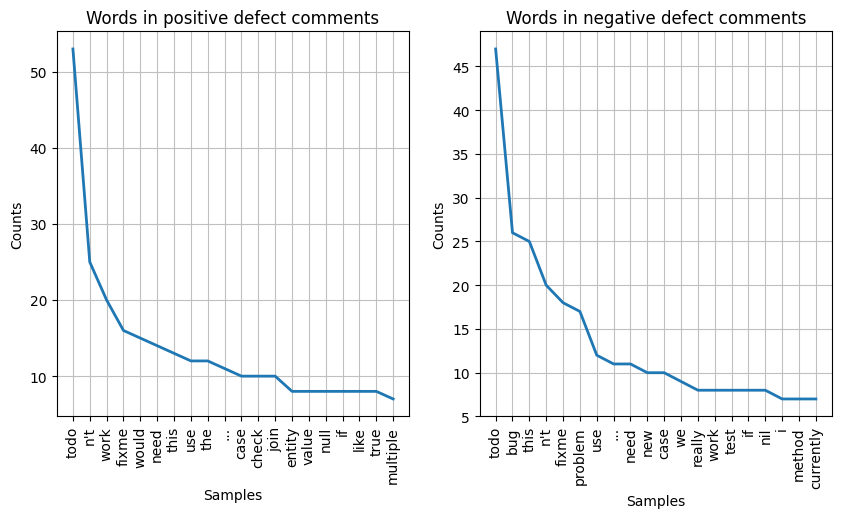

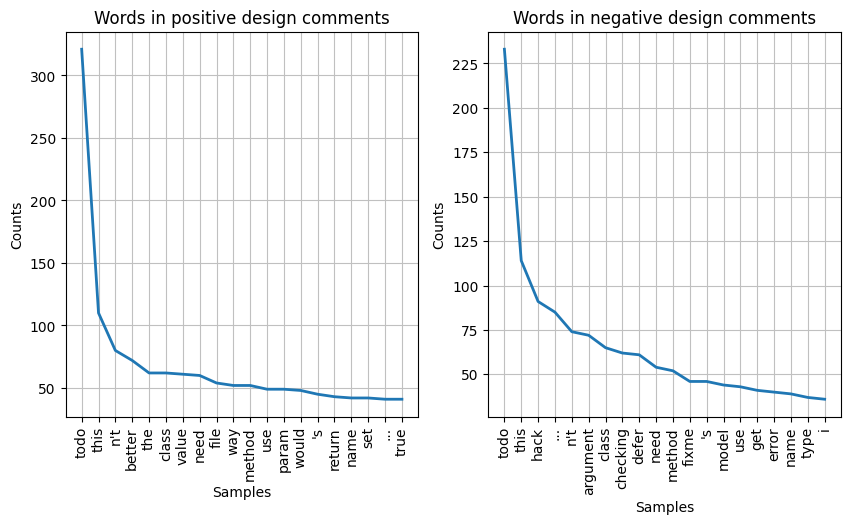

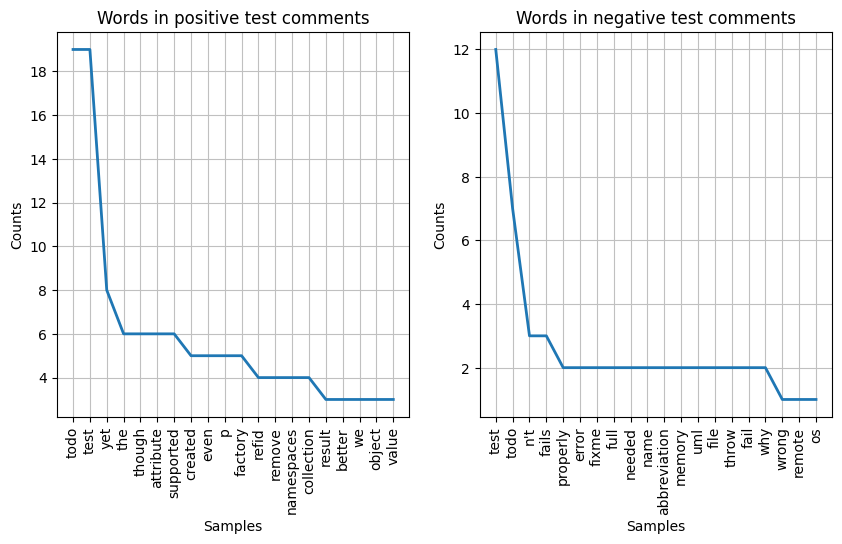

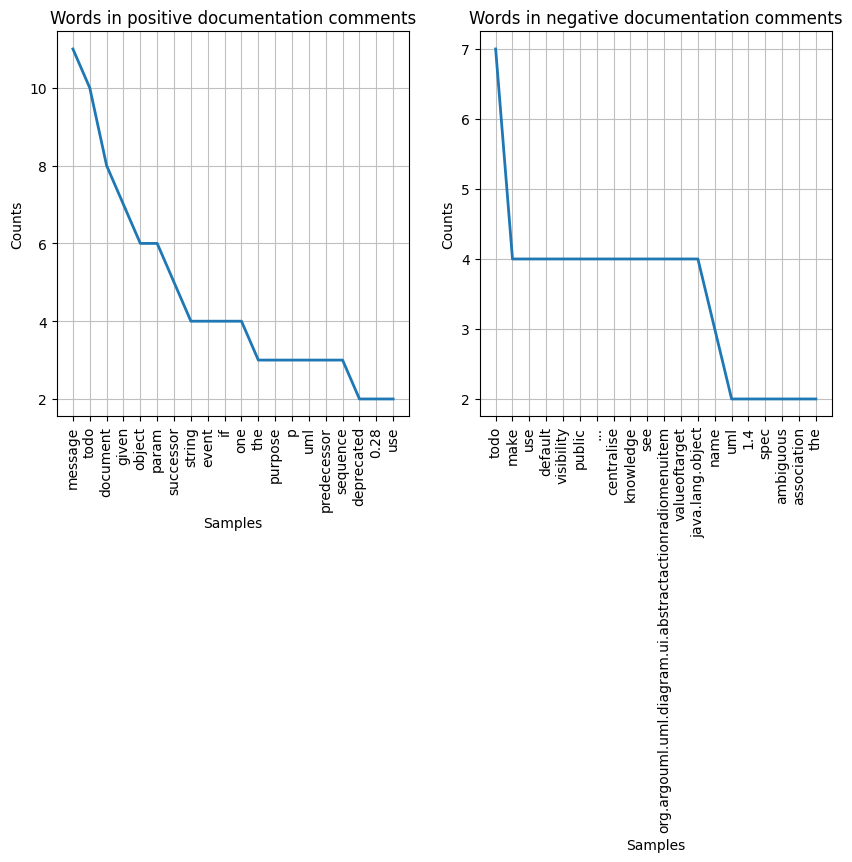

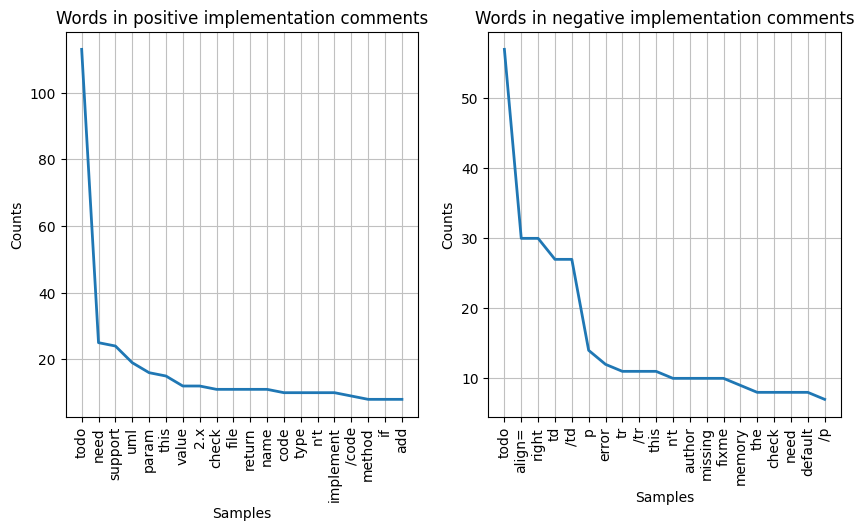

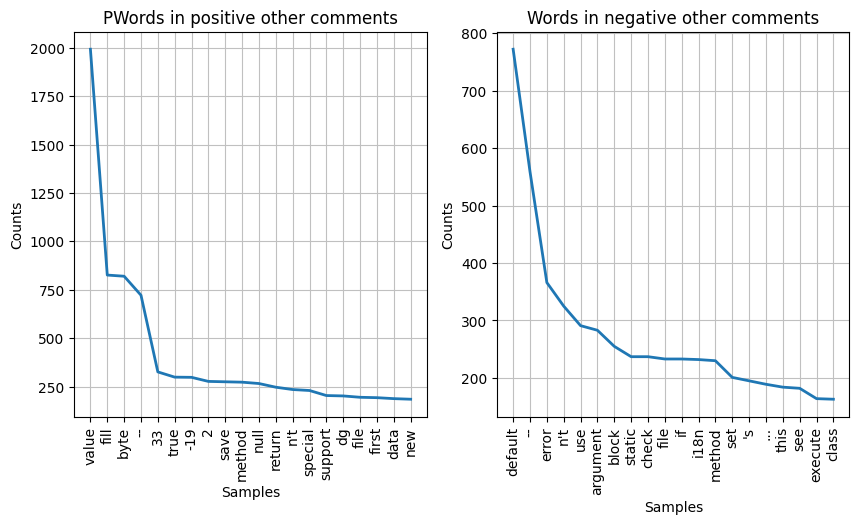

In [20]:
# Plot word frequencies

plt.subplot(1, 2, 1)
defect_fd_positive = FreqDist(positive_defect_words)
defect_fd_positive.plot(20, title="Words in positive defect comments", show=False)
plt.subplot(1, 2, 2)
defect_fd_negative = FreqDist(negative_defect_words)
defect_fd_negative.plot(20, title="Words in negative defect comments", show=False)
plt.show()

plt.subplot(1, 2, 1)
design_fd_positive = FreqDist(positive_design_words)
design_fd_positive.plot(20, title="Words in positive design comments", show=False)
plt.subplot(1, 2, 2)
design_fd_negative = FreqDist(negative_design_words)
design_fd_negative.plot(20, title="Words in negative design comments", show=False)
plt.show()

plt.subplot(1, 2, 1)
test_fd_positive = FreqDist(positive_test_words)
test_fd_positive.plot(20, title="Words in positive test comments", show=False)
plt.subplot(1, 2, 2)
test_fd_negative = FreqDist(negative_test_words)
test_fd_negative.plot(20, title="Words in negative test comments", show=False)
plt.show()

plt.subplot(1, 2, 1)
documentation_fd_positive = FreqDist(positive_documentation_words)
documentation_fd_positive.plot(20, title="Words in positive documentation comments", show=False)
plt.subplot(1, 2, 2)
documentation_fd_negative = FreqDist(negative_documentation_words)
documentation_fd_negative.plot(20, title="Words in negative documentation comments", show=False)
plt.show()

plt.subplot(1, 2, 1)
implementation_fd_positive = FreqDist(positive_implementation_words)
implementation_fd_positive.plot(20, title="Words in positive implementation comments", show=False)
plt.subplot(1, 2, 2)
implementation_fd_negative = FreqDist(negative_implementation_words)
implementation_fd_negative.plot(20, title="Words in negative implementation comments", show=False)
plt.show()

plt.subplot(1, 2, 1)
other_fd_positive = FreqDist(positive_other_words)
other_fd_positive.plot(20, title="Words in positive other comments", show=False)
plt.subplot(1, 2, 2)
other_fd_negative = FreqDist(negative_other_words)
other_fd_negative.plot(20, title="Words in negative other comments", show=False)
plt.show()

*8. We would like to test the various transitions generated by the sentiment analysis. More specifically, we count the
number of cases where an overall positive sentiment is followed by a positive sentiment for the next followed
comment. Summarize in a table, for each category, the number (or proportion) of cases of (Pos→Pos, Pos→Neg,
Neg → Neg, Neg → Neu, Neu→Neu, Pos→Neu, Neu→Neg, Neu→Pos). For neutral (Neu), you should consider
some threshold so that the overall sentiment score is between [-ε +ε] where ε is chosen close to zero (e.g., 0.1,
0.2). Similarly, comment whether the transition distribution is relevant to discriminate among the various
categories.*

In [22]:
def sentiment_transitions(sentiment_list, transitions_list):
    for n, comment in enumerate(sentiment_list):
        if n == 0:
            sentiment_prev = comment[3]
        else:
            sentiment_this = comment[3]
            if sentiment_this > 1:
                if sentiment_prev > 1: transitions_list[0] += 1 # Positive to positive
                elif sentiment_prev > -1: transitions_list[1] += 1 # Positive to negative
                else: transitions_list[5] += 1  # Positive to neutral
            elif sentiment_this < -1:
                if sentiment_prev > -1: transitions_list[2] += 1 # Negative to negative
                else: transitions_list[3] += 1  # Negative to neutral
            else:
                if sentiment_prev > 1: transitions_list[7] += 1 # Neutral to positive
                elif sentiment_prev > -1: transitions_list[6] += 1 # Neutral to negative
                else: transitions_list[4] += 1  # Neutral to neutral
        sentiment_prev = comment[3]

# 0 Pos → Pos, 1 Pos → Neg, 2 Neg → Neg, 3 Neg → Neu, 4 Neu → Neu, 5 Pos → Neu, 6 Neu → Neg, 7 Neu → Pos
defect_transitions = [0, 0, 0, 0, 0, 0, 0, 0]
design_transitions = [0, 0, 0, 0, 0, 0, 0, 0]
test_transitions = [0, 0, 0, 0, 0, 0, 0, 0]
documentation_transitions = [0, 0, 0, 0, 0, 0, 0, 0]
implementation_transitions = [0, 0, 0, 0, 0, 0, 0, 0]
other_transitions = [0, 0, 0, 0, 0, 0, 0, 0]

sentiment_transitions(sentiment_defect, defect_transitions)
sentiment_transitions(sentiment_design, design_transitions)
sentiment_transitions(sentiment_test, test_transitions)
sentiment_transitions(sentiment_documentation, documentation_transitions)
sentiment_transitions(sentiment_implementation, implementation_transitions)
sentiment_transitions(sentiment_other, other_transitions)

In [25]:
print("0 Pos → Pos, 1 Pos → Neg, 2 Neg → Neg, 3 Neg → Neu, 4 Neu → Neu, 5 Pos → Neu, 6 Neu → Neg, 7 Neu → Pos")
print(defect_transitions)
print(design_transitions)
print(test_transitions)
print(documentation_transitions)
print(implementation_transitions)
print(other_transitions)

0 Pos → Pos, 1 Pos → Neg, 2 Neg → Neg, 3 Neg → Neu, 4 Neu → Neu, 5 Pos → Neu, 6 Neu → Neg, 7 Neu → Pos
[0, 6, 25, 7, 93, 2, 330, 8]
[12, 55, 101, 41, 536, 24, 1861, 72]
[0, 1, 3, 1, 11, 0, 67, 1]
[0, 2, 1, 0, 7, 1, 39, 3]
[0, 8, 10, 1, 71, 1, 656, 9]
[5, 374, 462, 61, 4803, 44, 52041, 413]


In [29]:
print("Defect")
print("Positive to positive: " + str(defect_transitions[0]))
print("Positive to negative: " + str(defect_transitions[1]))
print("Negative to negative: " + str(defect_transitions[2]))
print("Negative to neutral: " + str(defect_transitions[3]))
print("Neutral to neutral: " + str(defect_transitions[4]))
print("Positive to neutral: " + str(defect_transitions[5]))
print("Neutral to negative: " + str(defect_transitions[6]))
print("Neutral to positive: " + str(defect_transitions[7]))
print("Design")
print("Positive to positive: " + str(design_transitions[0]))
print("Positive to negative: " + str(design_transitions[1]))
print("Negative to negative: " + str(design_transitions[2]))
print("Negative to neutral: " + str(design_transitions[3]))
print("Neutral to neutral: " + str(design_transitions[4]))
print("Positive to neutral: " + str(design_transitions[5]))
print("Neutral to negative: " + str(design_transitions[6]))
print("Neutral to positive: " + str(design_transitions[7]))
print("Test")
print("Positive to positive: " + str(test_transitions[0]))
print("Positive to negative: " + str(test_transitions[1]))
print("Negative to negative: " + str(test_transitions[2]))
print("Negative to neutral: " + str(test_transitions[3]))
print("Neutral to neutral: " + str(test_transitions[4]))
print("Positive to neutral: " + str(test_transitions[5]))
print("Neutral to negative: " + str(test_transitions[6]))
print("Neutral to positive: " + str(test_transitions[7]))
print("Documentation")
print("Positive to positive: " + str(documentation_transitions[0]))
print("Positive to negative: " + str(documentation_transitions[1]))
print("Negative to negative: " + str(documentation_transitions[2]))
print("Negative to neutral: " + str(documentation_transitions[3]))
print("Neutral to neutral: " + str(documentation_transitions[4]))
print("Positive to neutral: " + str(documentation_transitions[5]))
print("Neutral to negative: " + str(documentation_transitions[6]))
print("Neutral to positive: " + str(documentation_transitions[7]))
print("Implementation")
print("Positive to positive: " + str(implementation_transitions[0]))
print("Positive to negative: " + str(implementation_transitions[1]))
print("Negative to negative: " + str(implementation_transitions[2]))
print("Negative to neutral: " + str(implementation_transitions[3]))
print("Neutral to neutral: " + str(implementation_transitions[4]))
print("Positive to neutral: " + str(implementation_transitions[5]))
print("Neutral to negative: " + str(implementation_transitions[6]))
print("Neutral to positive: " + str(implementation_transitions[7]))
print("Other")
print("Positive to positive: " + str(other_transitions[0]))
print("Positive to negative: " + str(other_transitions[1]))
print("Negative to negative: " + str(other_transitions[2]))
print("Negative to neutral: " + str(other_transitions[3]))
print("Neutral to neutral: " + str(other_transitions[4]))
print("Positive to neutral: " + str(other_transitions[5]))
print("Neutral to negative: " + str(other_transitions[6]))
print("Neutral to positive: " + str(other_transitions[7]))

Defect
Positive to positive: 0
Positive to negative: 6
Negative to negative: 25
Negative to neutral: 7
Neutral to neutral: 93
Positive to neutral: 2
Neutral to negative: 330
Neutral to positive: 8
Design
Positive to positive: 12
Positive to negative: 55
Negative to negative: 101
Negative to neutral: 41
Neutral to neutral: 536
Positive to neutral: 24
Neutral to negative: 1861
Neutral to positive: 72
Test
Positive to positive: 0
Positive to negative: 1
Negative to negative: 3
Negative to neutral: 1
Neutral to neutral: 11
Positive to neutral: 0
Neutral to negative: 67
Neutral to positive: 1
Documentation
Positive to positive: 0
Positive to negative: 2
Negative to negative: 1
Negative to neutral: 0
Neutral to neutral: 7
Positive to neutral: 1
Neutral to negative: 39
Neutral to positive: 3
Implementation
Positive to positive: 0
Positive to negative: 8
Negative to negative: 10
Negative to neutral: 1
Neutral to neutral: 71
Positive to neutral: 1
Neutral to negative: 656
Neutral to positive: 9

*9. Use XGBoost machine learning algorithm for Technical Debt detection. Compute Precision, Recall and F1 score. Then apply sentiment based Technical Debt detection along with XGBoost machine learning algorithm. Compute Precision, Recall and F1 score. Evaluate if the negative sentiment could increase the failed detection of Technical Debt by machine learning algorithm. Compare the F1 scores of machine learning algorithm and machine learning algorithm augmented by sentiment analysis. Tabulate the results for deliverable.*

The dataset is quite imbalanced, so we will undersample the majority classes to balance the data.

In [4]:
print("Before undersampling:", end=" ")
print(len(defect_list), len(design_list), len(test_list), len(documentation_list), len(implementation_list), len(other_list))

other_list = other_list[::100] # choose every 100th comment
design_list = design_list[::5] # choose every 5th comment
print("After undersampling:", end=" ")
print(len(defect_list), len(design_list), len(test_list), len(documentation_list), len(implementation_list), len(other_list))

all_list = defect_list + design_list + test_list + documentation_list + implementation_list + other_list

Before undersampling: 472 2703 85 54 757 58204
After undersampling: 472 541 85 54 757 583


First let's try classification via tf-idf vectors and XGBoost.

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import xgboost as xgb

# Create the labels
y_other = [0] * len(other_list)
y_defect = [1] * len(defect_list)
y_design = [2] * len(design_list)
y_test = [3] * len(test_list)
y_documentation = [4] * len(documentation_list)
y_implementation = [5] * len(implementation_list)
# Explanation:
# x = [comment1, comment2 , ... , commentN]
# y = [other, defect, ... , documentation] = [0, 1, ..., 4]

# Split the data into training and testing sets
x = all_list
y = y_defect + y_design + y_test + y_documentation + y_implementation + y_other
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

# Create the bag-of-words (tf-idf) matrix
vectorizer = TfidfVectorizer(stop_words='english', min_df=0.001)
vectorizer.fit(x)
X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_test)

# Train the model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Evaluate via precision, recall, and f1-score
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       117
           1       0.63      0.55      0.59        94
           2       0.56      0.41      0.47       108
           3       0.75      0.53      0.62        17
           4       1.00      0.45      0.62        11
           5       0.63      0.78      0.70       152

    accuracy                           0.67       499
   macro avg       0.73      0.61      0.64       499
weighted avg       0.67      0.67      0.66       499



In [5]:
# Test some new comments
comment1 = "The sky is quite blue today" # Other (0)
comment2 = "This doesn't work the way it should" # Defect (1)
comment3 = "Might switch to a different library for this" # Design (2)
comment4 = "TODO: Need to add more tests for this" # Test (3)
comment5 = "TODO add documentation for the function" # Documentation (4)
comment6 = "TODO: Add support for multithreading and parallel processing" # Implementation (5)

comment_vectors = vectorizer.transform([comment1, comment2, comment3, comment4, comment5, comment6])

print("Comment 1 prediction: ", model.predict(comment_vectors)[0])
print("Comment 2 prediction: ", model.predict(comment_vectors)[1])
print("Comment 3 prediction: ", model.predict(comment_vectors)[2])
print("Comment 4 prediction: ", model.predict(comment_vectors)[3])
print("Comment 5 prediction: ", model.predict(comment_vectors)[4])
print("Comment 6 prediction: ", model.predict(comment_vectors)[5])

Comment 1 prediction:  0
Comment 2 prediction:  2
Comment 3 prediction:  0
Comment 4 prediction:  3
Comment 5 prediction:  4
Comment 6 prediction:  5


Now let's add sentiment analysis to the mix. We will calculate sentiscores for each comment and concatenate them to the tf-idf vectors to create a new feature set.

In [8]:
# Calculate the sentiment scores again as the data has been undersampled
sentiment_defect = senti.getSentiment(defect_list, score='scale') # use single scores this time for simplicity
sentiment_design = senti.getSentiment(design_list, score='scale')
sentiment_test = senti.getSentiment(test_list, score='scale')
sentiment_documentation = senti.getSentiment(documentation_list, score='scale')
sentiment_implementation = senti.getSentiment(implementation_list, score='scale')
sentiment_other = senti.getSentiment(other_list, score='scale')

# Vectorize the comments by category
X_defect = vectorizer.transform(defect_list).toarray() # use .toarray() for concatenation with sentiment values
X_design = vectorizer.transform(design_list).toarray()
X_tests = vectorizer.transform(test_list).toarray() # rename to X_tests to avoid conflict with X_test lololo
X_documentation = vectorizer.transform(documentation_list).toarray()
X_implementation = vectorizer.transform(implementation_list).toarray()
X_other = vectorizer.transform(other_list).toarray()

# Combine the tf-idf vectors with sentiscores
def combine_features_with_sentiment(X, sentiment):
    sentiment = np.array(sentiment).reshape(-1, 1)  # Reshape sentiment to 2D array to match tf-idf
    return np.hstack((X, sentiment))

X_defect_sentiment = combine_features_with_sentiment(X_defect, sentiment_defect)
X_design_sentiment = combine_features_with_sentiment(X_design, sentiment_design)
X_tests_sentiment = combine_features_with_sentiment(X_tests, sentiment_test)
X_documentation_sentiment = combine_features_with_sentiment(X_documentation, sentiment_documentation)
X_implementation_sentiment = combine_features_with_sentiment(X_implementation, sentiment_implementation)
X_other_sentiment = combine_features_with_sentiment(X_other, sentiment_other)

X_sentiment = np.vstack((X_defect_sentiment, X_design_sentiment, X_tests_sentiment, X_documentation_sentiment, X_implementation_sentiment, X_other_sentiment))
# Explanation:
# X = [(comment1, sentiment1), (comment2, sentiment2), ... , (commentN, sentimentN)]
# Y = [0, 1, ..., 4]

# Use the same indices from the original train_test_split to split X_sentiment
X_train2 = X_sentiment[[x.index(comment) for comment in x_train]]
X_test2 = X_sentiment[[x.index(comment) for comment in x_test]]

# Train the model
model_sentiment = xgb.XGBClassifier()
model_sentiment.fit(X_train2, y_train)

# Evaluate via precision, recall, and f1-score
y_pred2 = model_sentiment.predict(X_test2)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       117
           1       0.68      0.57      0.62        94
           2       0.55      0.43      0.48       108
           3       0.82      0.53      0.64        17
           4       1.00      0.64      0.78        11
           5       0.64      0.78      0.70       152

    accuracy                           0.69       499
   macro avg       0.75      0.64      0.68       499
weighted avg       0.68      0.69      0.68       499



### Binary classification (is the comment technical debt related or not?)

Finally, let's classify the comments into two categories: technical debt related or not. Since sentiment analysis seems ineffective, we will consider only the tf-idf features.

In [22]:
y_other_binary = [0] * len(other_list)
y_defect_binary = [1] * len(defect_list)
y_design_binary = [1] * len(design_list)
y_test_binary = [1] * len(test_list)
y_documentation_binary = [1] * len(documentation_list)
y_implementation_binary = [1] * len(implementation_list)
y_binary = y_defect_binary + y_design_binary + y_test_binary + y_documentation_binary + y_implementation_binary + y_other_binary

X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y_binary, test_size=0.2, random_state=0)

model_binary = xgb.XGBClassifier()
model_binary.fit(X_train4, y_train4)

# Evaluate via precision, recall, and f1-score
y_pred4 = model_binary.predict(X_test4)
print(classification_report(y_test4, y_pred4))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       118
           1       0.96      0.94      0.95       381

    accuracy                           0.93       499
   macro avg       0.90      0.91      0.90       499
weighted avg       0.93      0.93      0.93       499



In [11]:
comment1 = "This doesn't work the way it should" # 1 (Technical debt)
comment2 = "Need to switch to a different library later on" # 1
comment3 = "TODO: Add support for multithreading and parallel processing" # 1
comment4 = "TODO add documentation for the function" # 1
comment5 = "The sky is quite blue today" # 0 (Without classification)
comment6 = "Finds the local optima of the input" # 0
comment7 = "Calculates the sum of an array" # 0
comment8 = "display the spectrogram of an audio signal" # 0

comment_vectors = vectorizer.transform([comment1, comment2, comment3, comment4, comment5, comment6, comment7, comment8])

print("Comment 1 prediction: ", model_binary.predict(comment_vectors)[0])
print("Comment 2 prediction: ", model_binary.predict(comment_vectors)[1])
print("Comment 3 prediction: ", model_binary.predict(comment_vectors)[2])
print("Comment 4 prediction: ", model_binary.predict(comment_vectors)[3])
print("Comment 5 prediction: ", model_binary.predict(comment_vectors)[4])
print("Comment 6 prediction: ", model_binary.predict(comment_vectors)[5])
print("Comment 7 prediction: ", model_binary.predict(comment_vectors)[6])
print("Comment 8 prediction: ", model_binary.predict(comment_vectors)[7])

Comment 1 prediction:  1
Comment 2 prediction:  1
Comment 3 prediction:  1
Comment 4 prediction:  1
Comment 5 prediction:  0
Comment 6 prediction:  0
Comment 7 prediction:  0
Comment 8 prediction:  0
